In [10]:
# Install the necessary packages
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from src.data_services.data_pipeline import load_pair, load_and_prepare_pair
from src.visualization.pair_plots import plot_prices, plot_scaled_prices, plot_zscore_with_thresholds

start = "2024-01-01"
end = "2024-03-01"
interval="1h"

                     DOTUSDT  LINKUSDT
open_time                             
2024-01-01 00:00:00    8.267    15.122
2024-01-01 01:00:00    8.294    15.167
2024-01-01 02:00:00    8.253    15.065
2024-01-01 03:00:00    8.148    14.931
2024-01-01 04:00:00    8.140    14.920
...                      ...       ...
2024-02-29 20:00:00    8.539    19.755
2024-02-29 21:00:00    8.328    19.383
2024-02-29 22:00:00    8.142    19.033
2024-02-29 23:00:00    8.261    19.274
2024-03-01 00:00:00    8.387    19.501

[1441 rows x 2 columns]


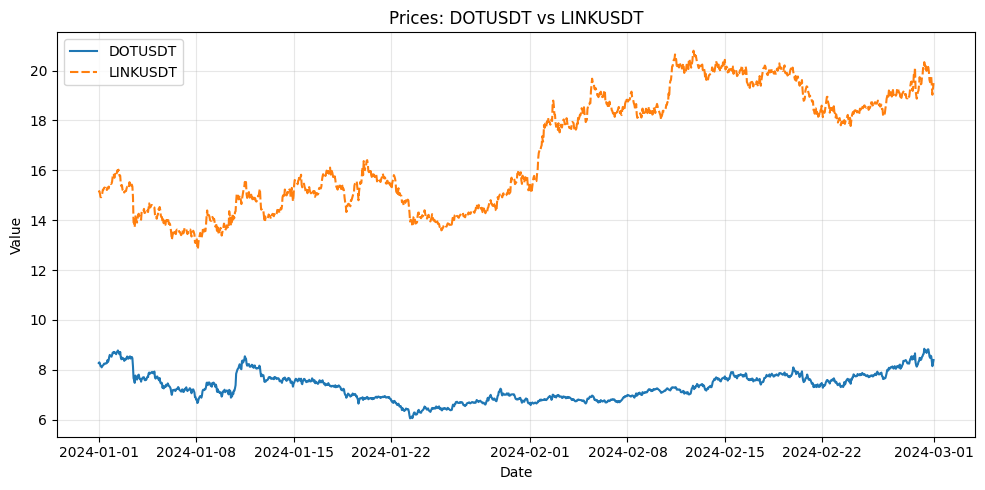

In [18]:
# 1. Load a single pair
df = load_pair(
    x="DOTUSDT",
    y="LINKUSDT",
    start=start,
    end=end,
    interval=interval,
)
print(df.data)
plot_prices(df, start, end, interval)

                     DOTUSDT  LINKUSDT  Spread   Z-Score  DOTUSDT_scaled  \
open_time                                                                  
2024-01-01 00:00:00    8.267    15.122  -6.855  1.173288        0.794771   
2024-01-01 01:00:00    8.294    15.167  -6.873  1.165093        0.804441   
2024-01-01 02:00:00    8.253    15.065  -6.812  1.192865        0.789756   
2024-01-01 03:00:00    8.148    14.931  -6.783  1.206069        0.752149   
2024-01-01 04:00:00    8.140    14.920  -6.780  1.207434        0.749284   
...                      ...       ...     ...       ...             ...   
2024-02-29 20:00:00    8.539    19.755 -11.216 -0.812194        0.892192   
2024-02-29 21:00:00    8.328    19.383 -11.055 -0.738894        0.816619   
2024-02-29 22:00:00    8.142    19.033 -10.891 -0.664227        0.750000   
2024-02-29 23:00:00    8.261    19.274 -11.013 -0.719772        0.792622   
2024-03-01 00:00:00    8.387    19.501 -11.114 -0.765755        0.837751   

           

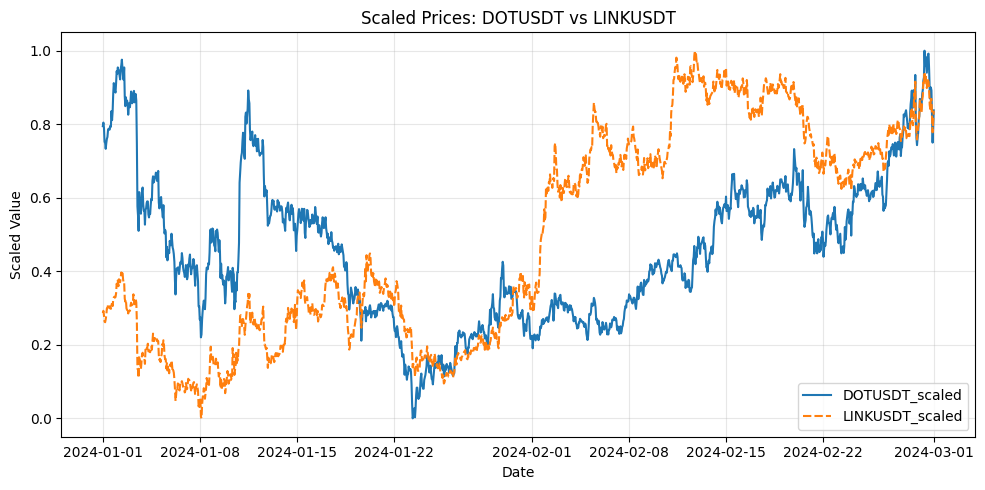

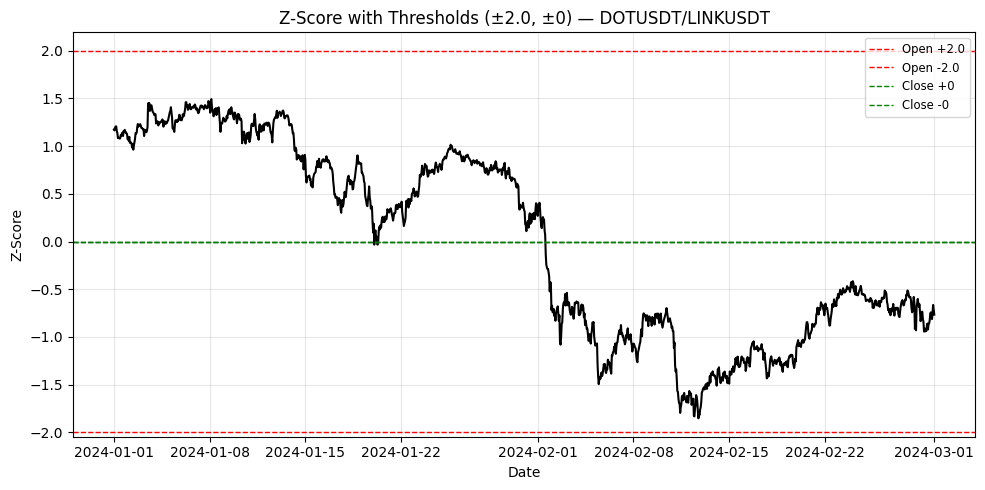

In [13]:
# 1. Load and prepare a single pair

pairs = [
    ("DOTUSDT", "LINKUSDT"),
    ("ADAUSDT", "AVAXUSDT"),
]
df = load_and_prepare_pair(
    x=pairs[0][0],
    y=pairs[0][1],
    start=start,
    end=end,
    interval=interval,
)
print(df.data)

plot_scaled_prices(df, start, end, interval)
plot_zscore_with_thresholds(df, start, end, interval)

                     DOTUSDT  LINKUSDT  Spread   Z-Score  DOTUSDT_scaled  \
open_time                                                                  
2024-01-01 00:00:00    8.267    15.122  -6.855  1.173288        0.794771   
2024-01-01 01:00:00    8.294    15.167  -6.873  1.165093        0.804441   
2024-01-01 02:00:00    8.253    15.065  -6.812  1.192865        0.789756   
2024-01-01 03:00:00    8.148    14.931  -6.783  1.206069        0.752149   
2024-01-01 04:00:00    8.140    14.920  -6.780  1.207434        0.749284   
...                      ...       ...     ...       ...             ...   
2024-02-29 20:00:00    8.539    19.755 -11.216 -0.812194        0.892192   
2024-02-29 21:00:00    8.328    19.383 -11.055 -0.738894        0.816619   
2024-02-29 22:00:00    8.142    19.033 -10.891 -0.664227        0.750000   
2024-02-29 23:00:00    8.261    19.274 -11.013 -0.719772        0.792622   
2024-03-01 00:00:00    8.387    19.501 -11.114 -0.765755        0.837751   

           

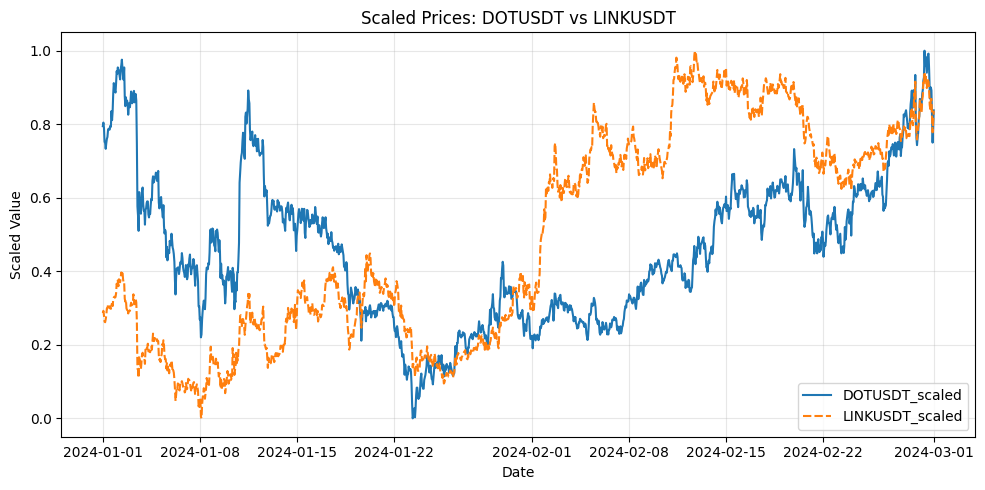

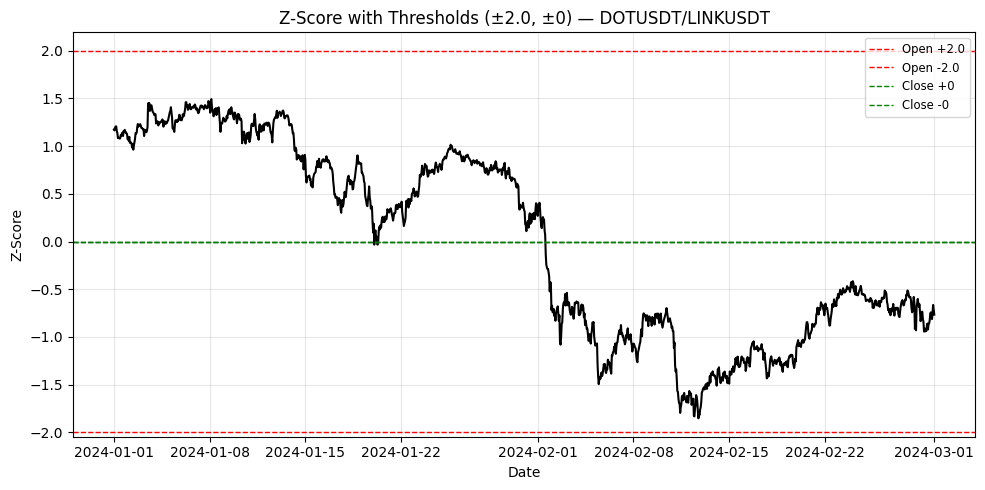

                     ADAUSDT  AVAXUSDT   Spread   Z-Score  ADAUSDT_scaled  \
open_time                                                                   
2024-01-01 00:00:00   0.5979     38.94 -38.3421 -0.791117        0.583434   
2024-01-01 01:00:00   0.6023     39.39 -38.7877 -0.936722        0.601126   
2024-01-01 02:00:00   0.5995     39.04 -38.4405 -0.823270        0.589867   
2024-01-01 03:00:00   0.5956     38.51 -37.9144 -0.651360        0.574186   
2024-01-01 04:00:00   0.5953     38.21 -37.6147 -0.553429        0.572979   
...                      ...       ...      ...       ...             ...   
2024-02-29 20:00:00   0.6756     42.11 -41.4344 -1.801565        0.895858   
2024-02-29 21:00:00   0.6625     41.28 -40.6175 -1.534633        0.843185   
2024-02-29 22:00:00   0.6485     40.16 -39.5115 -1.173233        0.786892   
2024-02-29 23:00:00   0.6547     40.97 -40.3153 -1.435885        0.811821   
2024-03-01 00:00:00   0.6718     41.93 -41.2582 -1.743989        0.880579   

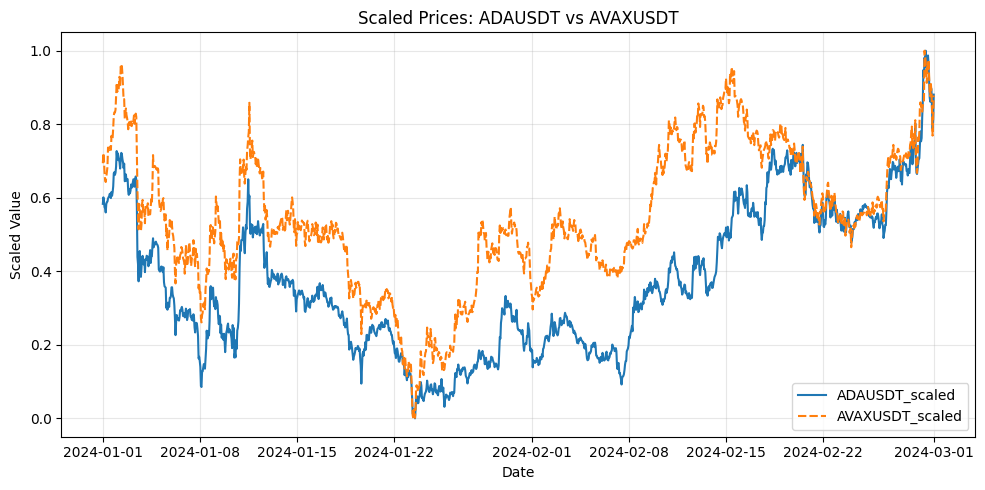

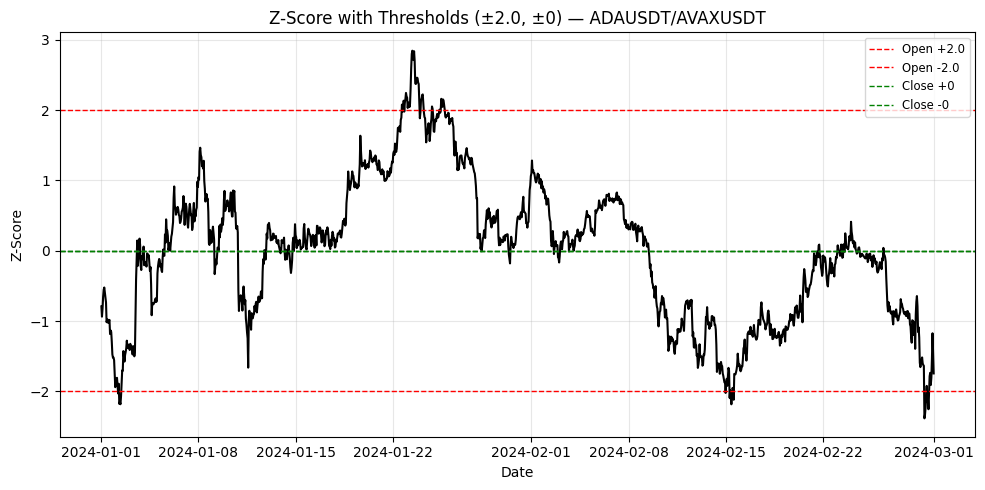

In [14]:
# 2. Load and prepare multiple pairs

pairs = [
    ("DOTUSDT", "LINKUSDT"),
    ("ADAUSDT", "AVAXUSDT"),
]
dfs_list = []

for pair in pairs:
    df = load_and_prepare_pair(
        x=pair[0],
        y=pair[1],
        start=start,
        end=end,
        interval=interval,
    )
    print(df.data)

    plot_scaled_prices(df, start, end, interval)
    plot_zscore_with_thresholds(df, start, end, interval)

    dfs_list.append((pair, df.data))

In [15]:
print(dfs_list[0][0])

('DOTUSDT', 'LINKUSDT')


In [16]:
print(dfs_list[0][1])

                     DOTUSDT  LINKUSDT  Spread   Z-Score  DOTUSDT_scaled  \
open_time                                                                  
2024-01-01 00:00:00    8.267    15.122  -6.855  1.173288        0.794771   
2024-01-01 01:00:00    8.294    15.167  -6.873  1.165093        0.804441   
2024-01-01 02:00:00    8.253    15.065  -6.812  1.192865        0.789756   
2024-01-01 03:00:00    8.148    14.931  -6.783  1.206069        0.752149   
2024-01-01 04:00:00    8.140    14.920  -6.780  1.207434        0.749284   
...                      ...       ...     ...       ...             ...   
2024-02-29 20:00:00    8.539    19.755 -11.216 -0.812194        0.892192   
2024-02-29 21:00:00    8.328    19.383 -11.055 -0.738894        0.816619   
2024-02-29 22:00:00    8.142    19.033 -10.891 -0.664227        0.750000   
2024-02-29 23:00:00    8.261    19.274 -11.013 -0.719772        0.792622   
2024-03-01 00:00:00    8.387    19.501 -11.114 -0.765755        0.837751   

           